In [5]:
from utils import db, graficos
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pylab as pl
import matplotlib.pyplot as plt
import validacao_cruzada as vl
from sklearn import svm
from sklearn.model_selection import cross_val_score, train_test_split, cross_validate, RepeatedStratifiedKFold

X, y = db.get_amostra_base(percentual=0.05)

#from tratamento_dados import balanceamento as blc
#X, y = blc.balanceamento(X, y)
#modelo_svm =  svm.SVC()
#vld_svm = vl.validacao_5x2(modelo_svm, X, y)
#atributos_treinamento = db.get_atributos_treinamento()
#dados_treinamento = db.ler_base_treinamento()
#rotulos_treinamento = db.get_rotulos_treinamento()

#modelo_knn = KNeighborsClassifier()

#vld_knn = vl.validacao_5x2(modelo_knn, X, y)

#modelo_svm =  svm.SVC()

#vld_svm = vl.validacao_cruzada(modelo_svm, X, y)

#print(atributos_treinamento)

#db.ler_sample_submission()



#X_train, X_test, y_train, y_test = train_test_split(dados_treinamento, rotulos_treinamento, train_size=0.01, stratify=rotulos_treinamento)

#db.normalizar_dados(dados_treinamento)
#graficos.grafico_balanceamento_classes()

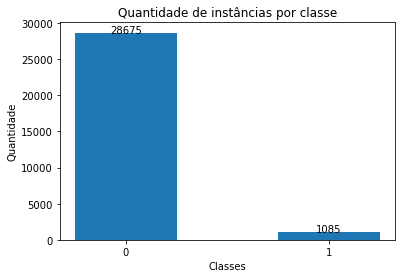

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


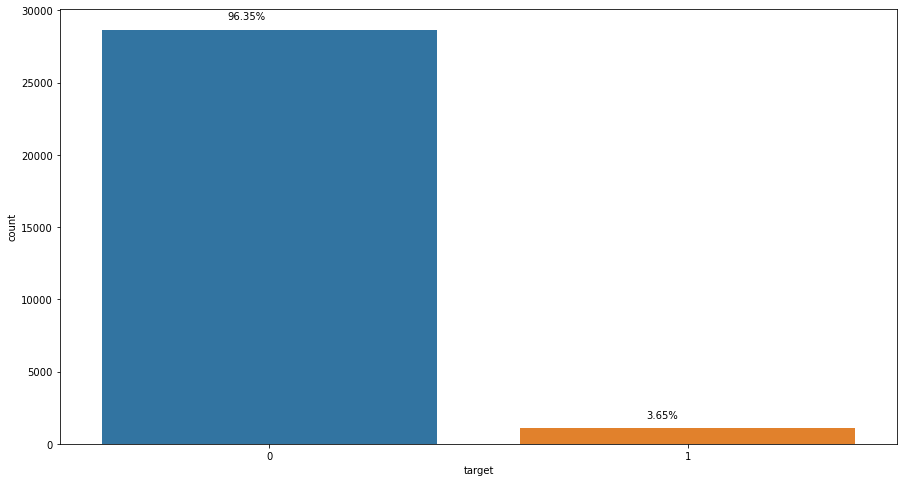

In [15]:
import seaborn as sns
type(X)
X.shape[0]

graficos.pandas_bar_plot(X['target'])


plt.figure(figsize=(15,8))

# faz um agrupamento da coluna 'target'
ax = sns.countplot('target', data=X)
ax.xlabel = 'dsadsadas'
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/X.shape[0]), 
        (p.get_x() + 0.3, p.get_height() + 700))

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,1,1,2,0,0,0,0,0,0,0,...,2,1,3,5,0,0,0,0,0,0
1,2,1,6,0,0,0,0,0,0,0,...,5,1,3,12,0,0,0,0,0,0
2,1,1,5,0,0,0,0,0,0,0,...,5,1,2,9,0,0,0,0,0,0
3,2,1,3,0,0,0,0,0,0,0,...,4,1,2,6,0,0,0,0,0,0
4,1,1,4,0,0,0,0,0,0,0,...,3,1,3,8,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,1,1,5,0,5,0,0,0,0,0,...,5,1,3,8,0,0,0,0,0,0
1081,1,1,3,0,0,0,0,0,0,0,...,10,1,5,11,0,0,0,0,0,0
1082,2,1,5,0,5,0,0,0,0,0,...,4,1,3,8,0,0,0,0,0,0
1083,1,1,6,0,0,0,0,0,0,0,...,5,1,2,7,0,0,0,0,0,0


In [21]:
sample_submission = db.ler_sample_submission()
sample_submission['target']


0         0.0364
1         0.0364
2         0.0364
3         0.0364
4         0.0364
           ...  
892811    0.0364
892812    0.0364
892813    0.0364
892814    0.0364
892815    0.0364
Name: target, Length: 892816, dtype: float64

In [5]:
dados_treinamento = db.ler_base_treinamento()
dados_treinamento

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,1488013,0,3,1,10,0,0,0,0,0,...,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,...,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,...,4,1,4,2,0,1,1,1,0,0


In [18]:
dados_treinamento = pd.read_csv('bases_de_dados/kaggle_submission.csv')


892816

In [1]:
from tratamento_dados import reducao_dimensionalidade as rd
from utils import db

X, y = db.get_amostra_base()
dados_reducao = rd.get_dados_reducao(X)

len(dados_reducao)

5952

In [2]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
import validacao_cruzada as vl
X_train, X_test, y_train, y_test = train_test_split(dados_reducao, y, train_size=0.7, stratify=y)
modelo_knn = KNeighborsClassifier()
modelo_knn.fit(X_train, y_train)
score = modelo_knn.score(X_test, y_test)
score

vld_knn = vl.validacao_5x2(modelo_knn, X_train, y_train)
vld_knn

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

,0,1,2,3,4,5,6,7,8,9,mean
fit_time,0.002267,0.002397,0.003379,0.002915,0.003230,0.001991,0.002343,0.002894,0.002054,0.001951,0.002542
score_time,0.057726,0.075734,0.085033,0.068414,0.063249,0.087003,0.064159,0.068260,0.064006,0.066721,0.070030
test_accuracy,0.961631,0.963986,0.963986,0.963986,0.960384,0.962830,0.962785,0.963986,0.963986,0.962785,0.963034
train_accuracy,0.963385,0.963096,0.963396,0.963396,0.964296,0.963685,0.963996,0.963096,0.963396,0.963696,0.963544
test_precision_macro,0.481393,0.481993,0.481993,0.481993,0.481348,0.481415,0.481971,0.481993,0.481993,0.481393,0.481748
train_precision_macro,0.682116,0.481693,0.731977,0.481698,0.982137,0.481843,0.857127,0.648498,0.481698,0.731987,0.656077
test_recall_macro,0.499377,0.500000,0.500000,0.500000,0.498753,0.500000,0.499377,0.500000,0.500000,0.500000,0.499751
train_recall_macro,0.507797,0.499844,0.507885,0.500000,0.508264,0.500000,0.512139,0.503787,0.500000,0.503977,0.504369
test_f1_macro,0.490220,0.490831,0.490831,0.490831,0.489896,0.490531,0.490520,0.490831,0.490831,0.490520,0.490584
train_f1_macro,0.506543,0.490601,0.506546,0.490678,0.507166,0.490753,0.514635,0.498598,0.490678,0.498884,0.499508


Validação cruzada sem tratamento de dados

In [1]:
from sklearn_lvq import GlvqModel
from utils import db
from sklearn.model_selection import train_test_split
import validacao_cruzada as vl

from sklearn import svm
import numpy as np

import warnings

X, y = db.get_amostra_base(percentual=0.0005)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=y)

# Modelo LVQ
# modelo_lvq = GlvqModel()
# modelo_lvq.fit(X_train, y_train)



# # Modelo SVM
# modelo_svm = svm.SVC()
# modelo_svm.fit(X_train, y_train)

# # Validação cruzada
# vld_lvq = vl.validacao_5x2(modelo_lvq, X_train, y_train)
# print(vld_lvq)


# vld_svm = vl.validacao_5x2(modelo_svm, X_train, y_train)


X_train, X_vld, y_train, y_vld = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train)



Melhores hiperparâmetros para o K-NN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from otimizacao import hiperparametros as hiper

# Modelo K-NN
modelo_knn = KNeighborsClassifier()
grid_search = hiper.melhores_hiperparametros(modelo_knn, hiper.conjunto_de_hiper_parametros()['knn'], X_train, X_vld, y_train, y_vld)

#vld_knn = vl.validacao_5x2(modelo_knn, X_train, y_train)
# print(vld_knn)
#vld_knn

Melhores hiperparâmetros para o MLP

In [13]:
%%capture --no-stdout
from sklearn.neural_network import MLPClassifier
from otimizacao import hiperparametros as hiper
modelo_mlp = MLPClassifier()


grid_mlp = hiper.melhores_hiperparametros(modelo_mlp, hiper.conjunto_de_hiper_parametros()['mlp'], X_train, X_vld, y_train, y_vld)

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        40
           1       0.00      0.00      0.00         2

    accuracy                           0.95        42
   macro avg       0.48      0.50      0.49        42
weighted avg       0.91      0.95      0.93        42

MLPClassifier(hidden_layer_sizes=6)
{'hidden_layer_sizes': 6}
scoring ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']


Melhores hiperparâmetros para o LVQ

In [ ]:
# Modelo LVQ
modelo_lvq = GlvqModel()

grid_lvq = hiper.melhores_hiperparametros(modelo_lvq, hiper.conjunto_de_hiper_parametros()['lvq'], X_train, X_vld, y_train, y_vld)

Melhores hiperparâmetros para árvore de decisão

In [ ]:
from sklearn import tree
from otimizacao import hiperparametros as hiper
modelo_tree = tree.DecisionTreeClassifier()
grid_tree = hiper.melhores_hiperparametros(modelo_tree, hiper.conjunto_de_hiper_parametros()['tree'], X_train, X_vld, y_train, y_vld)

In [2]:
from sklearn import svm
from otimizacao import hiperparametros as hiper
modelo_svm = svm.SVC()
# svm_params = [{'kernel': ['rbf'], 'gamma': [0.1, 0.5, 2, 5],
#                      'C': [0.1, 1.0 , 10, 100]},
#                     {'kernel': ['poly'], 'gamma': [0.1, 0.5, 2, 5],
#                      'degree': [2, 4, 7, 10], 'C': [0.1, 1.0 , 10, 100], 'coef0': [0.01, 0.05, 0.9, 2]},
#                      {'kernel': ['sigmoid'], 'gamma': [0.1, 0.5, 2, 5],
#                      'coef0': [0.01, 0.05, 0.9, 2], 'C': [0.1, 1.0 , 10, 100]},
#                     {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
grid_svm = hiper.melhores_hiperparametros(modelo_svm, hiper.conjunto_de_hiper_parametros()['svm'], X_train, X_vld, y_train, y_vld)

SyntaxError: unmatched ')' (hiperparametros.py, line 9)

In [ ]:
grid_search.best_params_
grid_search.best_estimator_
vld_knn = vl.validacao_5x2(grid_search.best_estimator_, X_train, y_train)
#grid_search.best_estimator_.fit(X_train, y_train)
score = grid_search.best_estimator_.score(X_test, y_test)

In [31]:
score

0.963597670250896

In [27]:
vld_knn

,0,1,2,3,4,5,6,7,8,9,mean
fit_time,0.021662,0.014275,0.006540,0.006512,0.006277,0.006402,0.007243,0.005935,0.005961,0.006281,0.008709
score_time,1.669354,1.398261,1.277313,1.251716,1.351245,1.234699,1.293016,1.286921,1.325379,1.265995,1.335390
test_accuracy,0.963396,0.963396,0.963396,0.963696,0.963696,0.963396,0.963396,0.963396,0.963696,0.963696,0.963516
train_accuracy,0.963546,0.963546,0.963546,0.963471,0.963471,0.963546,0.963621,0.963546,0.963471,0.963471,0.963524
test_precision_macro,0.481698,0.481698,0.481698,0.481848,0.481848,0.481698,0.481698,0.481698,0.481848,0.481848,0.481758
train_precision_macro,0.481773,0.481773,0.481773,0.481736,0.481736,0.481773,0.981809,0.481773,0.481736,0.481736,0.531762
test_recall_macro,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
train_recall_macro,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.501029,0.500000,0.500000,0.500000,0.500103
test_f1_macro,0.490678,0.490678,0.490678,0.490756,0.490756,0.490678,0.490678,0.490678,0.490756,0.490756,0.490710
train_f1_macro,0.490717,0.490717,0.490717,0.490698,0.490698,0.490717,0.492790,0.490717,0.490698,0.490698,0.490917
